Check the outcome if women are tested positive for diabetes or not.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [3]:
diabetes_data=pd.read_csv("/Users/mahrukhwaqar/datascience/ML Models/diabetes.csv")

In [4]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


diabetes_data.shape()

In [5]:
diabetes_data.shape

(768, 9)

In [6]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0, 0.5, 'Outcome')

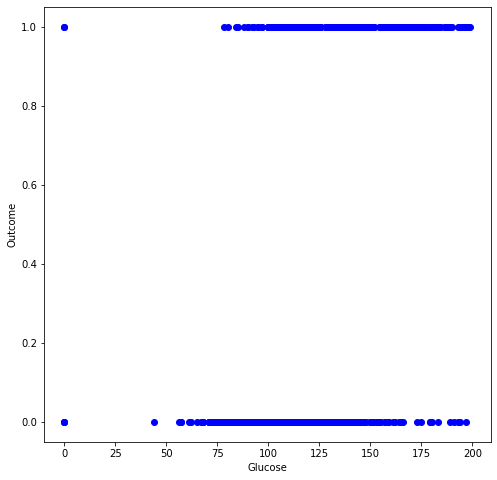

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(diabetes_data['Glucose'], diabetes_data['Outcome'], c='blue')

plt.xlabel('Glucose')
plt.ylabel('Outcome')

Text(0, 0.5, 'Insulin')

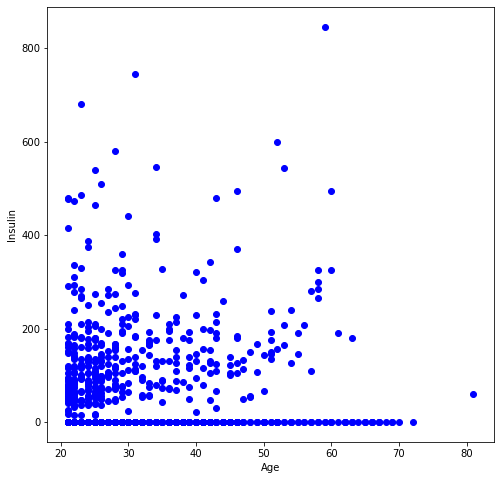

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(diabetes_data['Age'], diabetes_data['Insulin'], c='blue')

plt.xlabel('Age')
plt.ylabel('Insulin')

In [9]:
diabetes_data_correlation = diabetes_data.corr()
diabetes_data_correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

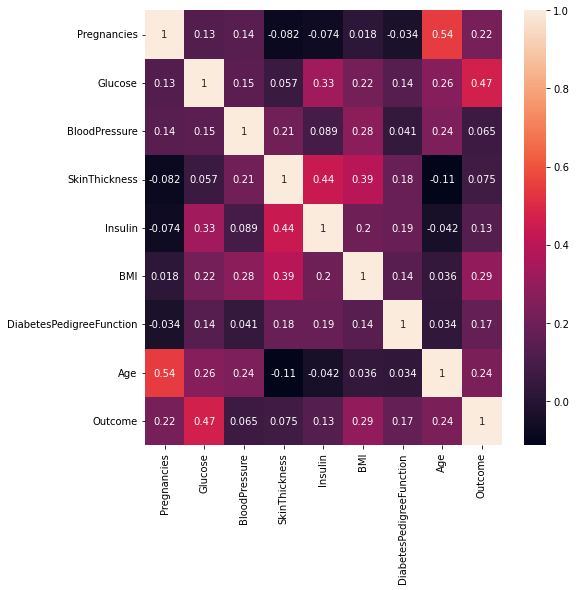

In [10]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(8,8))
sns.heatmap(diabetes_data_correlation, annot=True)

In [11]:
features = diabetes_data.drop('Outcome', axis=1)
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
# we observed that mean and std of these features were very different so we will apply standardization on mean
#and express them in terms of standard deviation
from sklearn import preprocessing
standard_scalar = preprocessing.StandardScaler()

In [13]:
#standardization scales all data to be centered around the mean and it is a common pre=processing technique used with numeric features.
features_scaled = standard_scalar.fit_transform(features)

#it will return numpy array
features_scaled.shape

(768, 8)

In [14]:
#converting numpy array to pandas dataframe
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
features_scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [15]:
features_scaled_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,3.614007e-18,-1.327244e-17,7.994184e-17,-3.556183e-17,2.295979e-16,2.462585e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


In [16]:
diabetes_data = pd.concat([features_scaled_df, diabetes_data["Outcome"]], axis=1)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [17]:
diabetes_data.to_csv("/Users/mahrukhwaqar/datascience/ML Models/Pima-Indians-Processed.csv", index=False)

In [18]:
!ls ML Models

ls: ML: No such file or directory
ls: Models: No such file or directory


In [19]:
!ls "ML Models"

ls: ML Models: No such file or directory


In [20]:
from sklearn.model_selection import train_test_split

X= diabetes_data.drop("Outcome", axis=1)
Y= diabetes_data["Outcome"]

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [22]:
X_train.shape, Y_train.shape

((537, 8), (537,))

In [23]:
X_test.shape, Y_test.shape

((231, 8), (231,))

In [ ]:
pip install -U scikit-learn

In [27]:
from sklearn.linear_model import LogisticRegression

classifier= LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
classifier.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [28]:
Y_pred= classifier.predict(X_test)
Y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1])

In [29]:
pred_results = pd.DataFrame({'Y_test': Y_test, 'Y_pred' : Y_pred})
pred_results.head(10)

,Y_test,Y_pred
590,1,1
61,1,1
222,0,0
749,1,1
210,0,0
522,0,0
330,0,1
11,1,1
663,1,1
482,0,0


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [34]:
model_accuracy= accuracy_score(Y_test, Y_pred)
model_precision= precision_score(Y_test, Y_pred)
model_recall= recall_score(Y_test, Y_pred)

print("Accuracy of the model is {}%" .format(model_accuracy * 100))
print("Precision of the model is {}%".format(model_precision * 100))
print("Recall of the model is {}%" .format(model_recall * 100))

Accuracy of the model is 76.19047619047619%
Precision of the model is 66.21621621621621%
Recall of the model is 62.0253164556962%


# Decision Tree Classifier

In [36]:
#we will be trying decision tree classifier and compare both results
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4)

In [37]:
Y_pred= classifier.predict(X_test)
Y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [38]:
pred_results = pd.DataFrame({'Y_test': Y_test, 'Y_pred' : Y_pred})
pred_results.head(10)

,Y_test,Y_pred
590,1,0
61,1,1
222,0,0
749,1,1
210,0,0
522,0,0
330,0,0
11,1,1
663,1,1
482,0,0


In [39]:
model_accuracy= accuracy_score(Y_test, Y_pred)
model_precision= precision_score(Y_test, Y_pred)
model_recall= recall_score(Y_test, Y_pred)

print("Accuracy of the model is {}%" .format(model_accuracy * 100))
print("Precision of the model is {}%".format(model_precision * 100))
print("Recall of the model is {}%" .format(model_recall * 100))

Accuracy of the model is 70.995670995671%
Precision of the model is 56.97674418604651%
Recall of the model is 62.0253164556962%


In [ ]:
#logistic regression performed well in comparison of these 2 models.